In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from IPython.display import HTML
from statsmodels.stats.outliers_influence import variance_inflation_factor

style = "<style>svg{width:70% !important;height:70% !important;}</style>"
HTML(style)

## 1. Data Handling
1. Read Data, 
2. Set Dictionary For Explicit Column Names, 
3. Set Dictionary For the Meanings of the Column Names

In [30]:
df = pd.read_csv('american_bankruptcy.csv')
df.head()

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


In [31]:
#ColumnNamesDictionary Relates the Short Names to the actual name
#dict contains the information describing what the name of the actual column means

ColumnNamesDictionary = {'X1':'Current assets','X2':'Cost of goods sold',
                   'X3':'Depreciation and amortization','X4':'EBITDA',
                   'X5':'Inventory','X6':'Net Income','X7':'Total Receivables',
                   'X8':'Market value','X9':'Net sales','X10':'Total assets',
                   'X11':'Total Long-term debt','X12':'EBIT','X13':'Gross Profit',
                   'X14':'Total Current Liabilities','X15':'Retained Earnings',
                   'X16':'Total Revenue','X17':'Total Liabilities','X18':'Total Operating Expenses'}

dict = {}
dict['Current assets'] = 'Current assets - All the assets of a company that are expected to be sold or used as a result of standard.\
business operations over the next year'
dict['Cost of goods sold'] = 'Cost of goods sold - The total amount a company paid as a cost directly related to the sale of products'
dict['Depreciation and amortization'] = 'Depreciation and amortization - Depreciation refers to the loss of value of a tangible fixed asset over.\
time (such as property, machinery, buildings, and plant). Amortization refers to the loss of value of.\
intangible assets over time.'
dict['EBITDA'] = 'EBITDA - Earnings before interest, taxes, depreciation, and amortization. It is a measure of a company"s.\
overall financial performance, serving as an alternative to net income.'
dict['Inventory'] = 'Inventory - The accounting of items and raw materials that a company either uses in production or sells.'
dict['Net Income'] = 'Net Income - The overall profitability of a company after all expenses and costs have been deducted from.\
total revenue.'
dict['Total Receivables'] = 'Total Receivables - The balance of money due to a firm for goods or services delivered or used but not.\
yet paid for by customers.'
dict['Market value'] = 'Market value - The price of an asset in a marketplace. In this dataset, it refers to the market.\
capitalization since companies are publicly traded in the stock market.'
dict['Net sales'] = 'Net sales - The sum of a company"s gross sales minus its returns, allowances, and discounts.'
dict['Total assets'] = 'Total assets - All the assets, or items of value, a business owns.'
dict['Total Long-term debt'] = 'Total Long-term debt - A company"s loans and other liabilities that will not become due within one year.\
of the balance sheet date.'
dict['EBIT'] = 'EBIT - Earnings before interest and taxes.'
dict['Gross Profit'] = 'Gross Profit - The profit a business makes after subtracting all the costs that are related to.\
manufacturing and selling its products or services.'
dict['Total Current Liabilities'] = 'Total Current Liabilities - The sum of accounts payable, accrued liabilities, and taxes such as Bonds.\
payable at the end of the year, salaries, and commissions remaining.'
dict['Retained Earnings'] = 'Retained Earnings - The amount of profit a company has left over after paying all its direct costs,.\
indirect costs, income taxes, and its dividends to shareholders.'
dict[ 'Total Revenue'] = 'Total Revenue - The amount of income that a business has made from all sales before subtracting expenses..\
It may include interest and dividends from investments.'
dict['Total Liabilities'] = 'Total Liabilities - The combined debts and obligations that the company owes to outside parties.'
dict['Total Operating Expenses'] = 'Total Operating Expenses - The expenses a business incurs through its normal business operations.'

In [32]:
df = pd.get_dummies(df, columns=['status_label'], dtype = int)
df = df.drop('status_label_failed', axis = 1)
col = df.pop('status_label_alive')   # remove and keep the column
df.insert(0, 'status_label_alive', col)
df.head()

,status_label_alive,company_name,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,1,C_1,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,1,C_1,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,1,C_1,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,1,C_1,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,1,C_1,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


In [33]:
#no missing data
description = df.describe(percentiles=[0.25, 0.75, 0.95]).T
dataDescription = pd.DataFrame({'missing':df.isnull().sum(),'nUnique':df.nunique()})
dataDescribeStat = dataDescription.merge(description, left_index=True, right_index=True, how='outer')
dataDescribeStat.head()

,missing,nUnique,count,mean,std,min,25%,50%,75%,95%,max
X1,0,65895,78682.0,880.362485,3928.564794,-7.760,18.92400,100.4495,431.52675,3507.98500,169662.0
X10,0,71521,78682.0,2867.110620,12917.944421,0.001,37.36350,213.2035,1171.36475,12220.83930,531864.0
X11,0,39741,78682.0,722.483710,3242.170946,-0.023,0.00000,7.5935,248.76075,3328.55150,166250.0
X12,0,56949,78682.0,255.525035,1494.643534,-25913.000,-2.78700,6.5180,87.59900,1066.89905,71230.0
X13,0,64952,78682.0,769.490783,3774.703114,-21536.000,8.52125,63.5815,344.07425,2979.48770,137106.0


In [34]:
alive_count = df[df['status_label_alive'] == 1]['status_label_alive'].count()
total_count = df['status_label_alive'].count()
print('Alive Ratio:', alive_count/total_count)
print('Failed Ratio:', 1 - alive_count/total_count)

Alive Ratio: 0.9336569990595054
Failed Ratio: 0.06634300094049461


## 2. Correlation Matrix

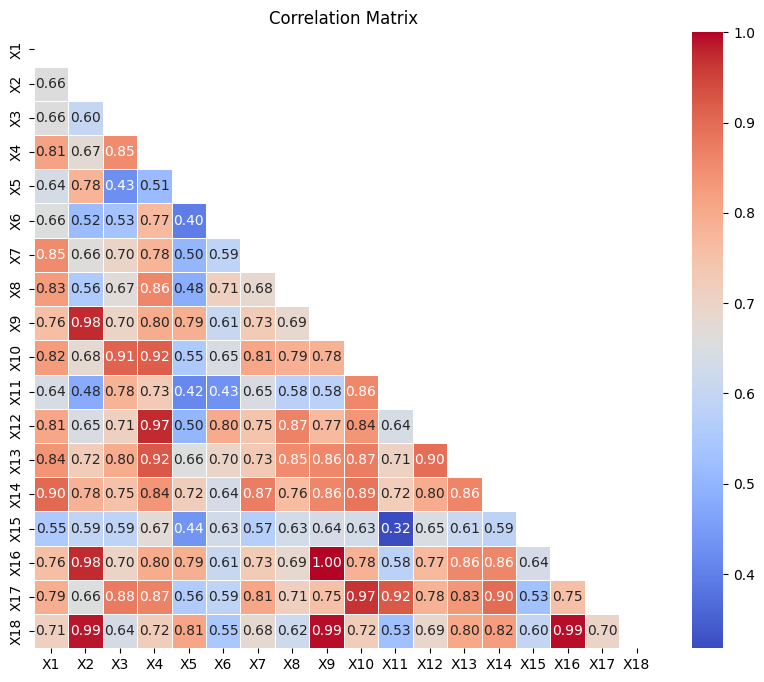

In [35]:
vars = [name for name in df.columns]
data = df[vars[3:]]
corrMatrix = data.corr()

mask = np.triu(np.ones_like(corrMatrix, dtype=bool)) #to drop the upper half the matrix, it is symmetric

plt.figure(figsize=(10, 8))
sns.heatmap(corrMatrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.title('Correlation Matrix')
plt.show()

A lot of variables are highly correlated. Perform VIF Analysis to see what features may be redundant

In [36]:
X = df.drop(columns=['company_name', 'status_label_alive'])
y = df['status_label_alive']

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

/Users/dmitrii/Desktop/DS/venv/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


   feature           VIF
0     year  1.084816e+00
1       X1  1.139660e+01
2       X2  1.958087e+14
3       X3  1.045889e+12
4       X4  3.900193e+09
5       X5  4.362706e+00
6       X6  3.098459e+00
7       X7  6.928806e+00
8       X8  6.767825e+00
9       X9           inf
10     X10  4.449185e+01
11     X11  1.670853e+01
12     X12  5.462219e+12
13     X13  3.532235e+13
14     X14  2.797125e+01
15     X15  2.966199e+00
16     X16           inf
17     X17  8.289702e+01
18     X18  2.649176e+14


No variavles with a $VIF < 10 \Rightarrow$ severe multicollinearity $\Rightarrow$ Logistic Regression should not be used

## 3. Model Training

### 3.1 Pre-processing

In [137]:
from tqdm import tqdm
X = df.drop(['company_name', 'status_label_alive'], axis = 1)
y = df['status_label_alive']

rf = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(
    n_estimators=1,  # Start with 1 tree
    warm_start=True,  # Enable incremental training
    n_jobs=-1,       # Use all CPU cores
    random_state=42
)

# Train with progress bar
for _ in tqdm(range(100), desc="Training Progress", unit="tree"):
    rf.n_estimators += 1  # Add one tree per iteration
    rf.fit(X_train, y_train)  # Fit incrementally

y_rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_rf_pred)
mean_cross_val_score = cross_val_score(rf, X_train, y_train, cv = 5).mean()
print("Random Forest Accuracy: {:.2f}%".format(rf_accuracy * 100))
print("Cross Val Score: {:.2f}%".format(mean_cross_val_score * 100))


Training Progress: 100%|██████████| 100/100 [00:21<00:00,  4.68tree/s]


Random Forest Accuracy: 93.62%
Cross Val Score: 93.84%


Very sucpicios result for the accuracy, it is exactly the same is the Alive/Failed Ratio:
1. A simple model that always chooses classes 1 (Alive) would have the same (or even slightly higer accuracy)
2. Accuracy does not give informative insight:

    --- The dataset is highly unbalanced, the classifier is biased towards class 1

3. Idea for solving this problem:

    --- Make two type classifiers:

    1) Random Forest trained on equally balanced train sets
    2) Random Forest trained on the train set obtained from the whole dataset (unbalanced Random Forest)

    --- Expected problems:

    1) An equally balanced train dataset is small (only 6% of the dataset contains class 0)

        ---> therefore the Random Forest may catch some random rather than general trend

       Solution:
            create several (Num) Random forests that are trained on balanced dataset. But each one is trained one a balanced dataset obtained from a random part of the whole dataset
    2) Introduce weight of the unbalanced Random Forest to control the its amount of vote
    

## 4. Balanced + Unbalanced Classifiers

### 4.0. Create Equal Random Train Sets

In [138]:
import random

data = df.drop('company_name', axis = 1)

def random_equal(df):
    df_rf_selected_0 = df[df['status_label_alive'] == 0]
    df_rf_selected_1 = df[df['status_label_alive'] == 1]
    X_0 = df_rf_selected_0.drop('status_label_alive',axis=1)
    X_1 = df_rf_selected_1.drop('status_label_alive',axis=1)
    y_0 = df_rf_selected_0['status_label_alive']
    y_1 = df_rf_selected_1['status_label_alive']
    start = random.randint(0, len(X_1) - len(X_0))
    #take random part of the sample
    X_1_trunc = X_1[start:start + len(X_0)]
    y_1_trunc = y_1[start:start + len(X_0)]

    X_equal = pd.concat([X_1_trunc, X_0], axis=0, ignore_index=True)
    y_equal = pd.concat([y_1_trunc, y_0], axis=0, ignore_index=True)
    return X_equal, y_equal

### 4.1.Train Forests

In [139]:
from tqdm import tqdm

def predictor_balanced_clasess(Num, data):
    def rf_clfs(n):
        arr = []
        for i in range(0,n):
            arr.append(RandomForestClassifier(n_estimators=3))
        return arr
    
    rfs = rf_clfs(Num)

    for n in tqdm(range(0, Num), desc="Training Models", ncols=100, bar_format="{l_bar}{bar:30}{r_bar}", colour="green"):
        X_equal, y_equal = random_equal(data)
        X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_equal, y_equal, test_size=0.2)
        rfs[n].fit(X_rf_train, y_rf_train)
    return rfs #contains Num RandomForest Classifiers trained on balanced datasets

X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_unbalanced = RandomForestClassifier(
    n_estimators=1,  # Start with 1 tree
    warm_start=True,  # Enable incremental training
    n_jobs=-1,       # Use all CPU cores
    random_state=42
)

# Train with progress bar
for _ in tqdm(range(100), desc="Training Progress", unit="tree"):
    rf_unbalanced.n_estimators += 1  # Add one tree per iteration
    rf_unbalanced.fit(X_rf_train, y_rf_train)  # Fit incrementally

rfs_balanced = predictor_balanced_clasess(100, data)

Training Models: 100%|██████████████████████████████| 100/100 [00:06<00:00, 16.36it/s]


### 4.2. Prediction

In [140]:
def prediction(Num, weight, rfs_balanced, rf_unbalanced, X_rf_test):   
    weights = np.array([1] * Num + [weight])
    probas = []
    for n in range(Num):
            model = rfs_balanced[n]
            proba = model.predict_proba(X_rf_test)  
            probas.append(proba)
    prob_unbalanced = rf_unbalanced.predict_proba(X_rf_test)
    probas.append(prob_unbalanced)
    weighted_avg_proba = np.average(probas, axis=0, weights=weights)
    y_pred = np.argmax(weighted_avg_proba, axis=1)
    return y_pred

### 4.3. Study how recall changes for Num (number of rf on balanced data), weight (strength of the rf trained on the large unbalanced dataset)

Training Models: 100%|██████████████████████████████| 10/10 [00:00<00:00, 14.61it/s]


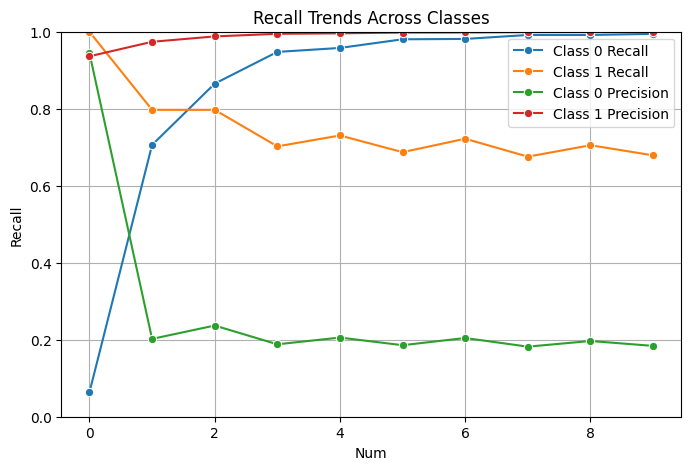

In [141]:
def calculate_recall_precision(confusion_matrix):
    # Recall for class 0 (True Negative Rate)
    tn = confusion_matrix[0, 0]
    fp = confusion_matrix[0, 1]
    tp = confusion_matrix[1, 1]
    fn = confusion_matrix[1, 0]

    recall_0 = tn / (tn + fp) if (tn + fp) != 0 else 0
    precision_0 = tn / (tn + fn) if (tn + fn) != 0 else 0
    
    recall_1 = tp / (tp + fn) if (tp + fn) != 0 else 0
    precision_1 = tp / (tp + fp) if (tp + fp) != 0 else 0
    
    return [[recall_0, recall_1], [precision_0, precision_1]]

recall_values = []
precision_values = []
for n in tqdm(range(0, 10), desc="Training Models", ncols=100, bar_format="{l_bar}{bar:30}{r_bar}", colour="green"):
    y_pred = prediction(n, 1, rfs_balanced, rf_unbalanced, X_rf_test)
    cm = confusion_matrix(y_rf_test, y_pred)
    recall_values.append(calculate_recall_precision(cm)[0])
    precision_values.append(calculate_recall_precision(cm)[1])

recall_class_0, recall_class_1 = zip(*recall_values)
precision_class_0, precision_class_1 = zip(*precision_values)
n_equal = [i for i in range(0,10)]
plt.figure(figsize=(8, 5))
sns.lineplot(x=n_equal, y=recall_class_0,label="Class 0 Recall", marker="o")
sns.lineplot(x=n_equal, y=recall_class_1,label="Class 1 Recall", marker="o")
sns.lineplot(x=n_equal, y=precision_class_0,label="Class 0 Precision", marker="o")
sns.lineplot(x=n_equal, y=precision_class_1,label="Class 1 Precision", marker="o")
plt.title("Recall Trends Across Classes")
plt.xlabel('Num')
plt.ylabel('Recall')
plt.ylim(0, 1)  # Recall is between 0 and 1
plt.grid(True)
plt.show()

Training Models: 100%|██████████████████████████████| 20/20 [00:01<00:00, 19.42it/s]


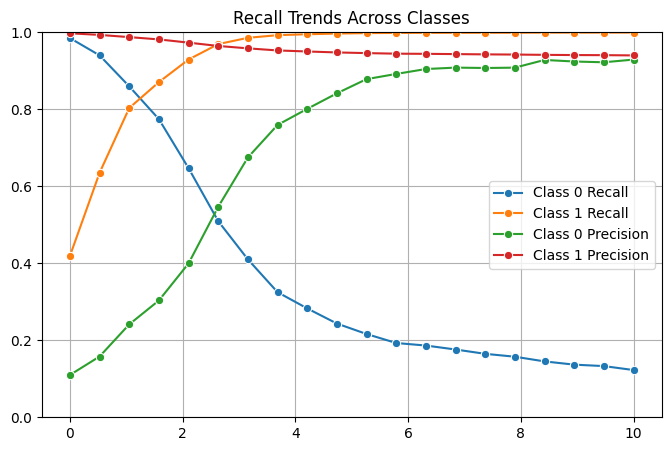

In [142]:
recall_values = []
precision_values = []
weights = np.linspace(0,10,20)
for weight in tqdm(weights, desc="Training Models", ncols=100, bar_format="{l_bar}{bar:30}{r_bar}", colour="green"):
    y_pred = prediction(2, weight, rfs_balanced, rf_unbalanced, X_rf_test)
    cm = confusion_matrix(y_rf_test, y_pred)
    recall_values.append(calculate_recall_precision(cm)[0])
    precision_values.append(calculate_recall_precision(cm)[1])

recall_class_0, recall_class_1 = zip(*recall_values)
precision_class_0, precision_class_1 = zip(*precision_values)
plt.figure(figsize=(8, 5))
sns.lineplot(x=weights, y=recall_class_0,label="Class 0 Recall", marker="o")
sns.lineplot(x=weights, y=recall_class_1,label="Class 1 Recall", marker="o")
sns.lineplot(x=weights, y=precision_class_0,label="Class 0 Precision", marker="o")
sns.lineplot(x=weights, y=precision_class_1,label="Class 1 Precision", marker="o")
plt.title("Recall Trends Across Classes")
plt.ylim(0, 1)  # Recall is between 0 and 1
plt.grid(True)
plt.show()

In [143]:
weights = np.linspace(0,10,20)
y_pred = prediction(2, weights[2], rfs_balanced, rf_unbalanced, X_rf_test)
print(accuracy_score(y_pred, y_rf_test), recall_score(y_pred, y_rf_test))

cr = classification_report(y_rf_test, y_pred)
print("Classification Report:")
print(cr)

0.8070788587405477 0.9874298164753206
Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.86      0.38      1068
           1       0.99      0.80      0.89     14669

    accuracy                           0.81     15737
   macro avg       0.61      0.83      0.63     15737
weighted avg       0.94      0.81      0.85     15737



## We arived at a rather high recall, however, precision for class 0 is rather low

## Recall Seems to be higher, high recall ---> we do not miss the company that is facing bankruptcy, but guess some good companies as those how are goin bankrupt

## 5. ROC-Curve Analysis

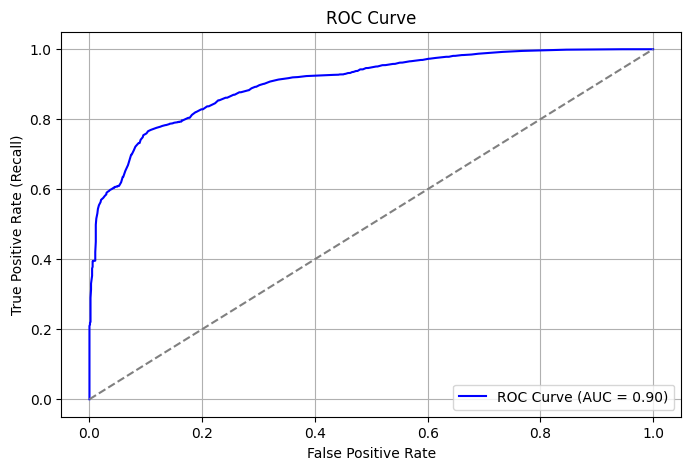

In [146]:
proba_bal_1 = rfs_balanced[99].predict_proba(X_rf_test)
proba_bal_2 = rfs_balanced[98].predict_proba(X_rf_test)
proba_unbal = rf_unbalanced.predict_proba(X_test)

weights = np.linspace(0,10,20)
probas = np.stack([proba_bal_1, proba_bal_2, proba_unbal])  # shape = (3, n_samples, 2)
weights = np.array([1, 1, weights[2]])

weighted_avg_proba = np.average(probas, axis=0, weights=weights)

y_scores = weighted_avg_proba[:, 1]


# Step 2: Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Step 3: Compute AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)

# Step 4: Plot
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## 6. Feature Importance

In [151]:
def least_important(X, rfs_balanced, rf_unbalanced, Num, weight): 
    weights = np.linspace(0,10,20)

    importances_balanced = [rfs_balanced[i].feature_importances_ for i in range(Num)]
    importances_unbal = rf_unbalanced.feature_importances_

    importances_all = np.stack(importances_balanced + [importances_unbal])

    # Compute weighted sum of importances
    weighted_importances = np.average(importances_all, axis=0, weights=[1,1,weight])

    least_important_idx = np.argmin(weighted_importances)
    least_important_feature = X.columns[least_important_idx]

    return least_important_feature

data = df.drop('company_name', axis = 1)
X, y = data.drop('status_label_alive', axis = 1), data['status_label_alive']
features = len(X.columns)
weights = np.linspace(0,10,20)

n = 0
accuracy_recall = []
least = []
roc = []
while n < features:
    X, y = data.drop('status_label_alive', axis = 1), data['status_label_alive']
    rfs_balanced = predictor_balanced_clasess(100, data) #train balanced

    X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X, y, test_size=0.2, random_state=42) #train unbalanced
    rf_unbalanced = RandomForestClassifier(
        n_estimators=1,  # Start with 1 tree
        warm_start=True,  # Enable incremental training
        n_jobs=-1,       # Use all CPU cores
        random_state=42
    )

    # Train with progress bar
    for _ in tqdm(range(100), desc="Training Progress", unit="tree"):
        rf_unbalanced.n_estimators += 1  # Add one tree per iteration
        rf_unbalanced.fit(X_rf_train, y_rf_train)  # Fit incrementally
    y_pred = prediction(2, weights[2], rfs_balanced, rf_unbalanced, X_rf_test)
    accuracy_recall.append([accuracy_score(y_pred, y_rf_test), recall_score(y_pred, y_rf_test)])

    proba_bal_1 = rfs_balanced[99].predict_proba(X_rf_test)
    proba_bal_2 = rfs_balanced[98].predict_proba(X_rf_test)
    proba_unbal = rf_unbalanced.predict_proba(X_rf_test)

    weights = np.linspace(0,10,20)
    probas = np.stack([proba_bal_1, proba_bal_2, proba_unbal])  # shape = (3, n_samples, 2)
    weights = np.array([1, 1, weights[2]])

    weighted_avg_proba = np.average(probas, axis=0, weights=weights)

    y_scores = weighted_avg_proba[:, 1]

    # Step 2: Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)

    # Step 3: Compute AUC (Area Under Curve)
    roc_auc = auc(fpr, tpr)

    roc.append(roc_auc)

    cr = classification_report(y_rf_test, y_pred)
    print("Classification Report:")
    print(cr)

    least_important_feature = least_important(X, rfs_balanced, rf_unbalanced, 2, weights[2]) 
    least.append(least_important_feature)
    print(least_important_feature)
    data = data.drop(least_important_feature, axis = 1)
    n += 1        


Training Progress: 100%|██████████| 100/100 [00:21<00:00,  4.74tree/s]


Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.83      0.39      1068
           1       0.99      0.83      0.90     14669

    accuracy                           0.83     15737
   macro avg       0.62      0.83      0.65     15737
weighted avg       0.94      0.83      0.86     15737

X16


Training Progress: 100%|██████████| 100/100 [00:21<00:00,  4.74tree/s]


Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.83      0.42      1068
           1       0.99      0.85      0.91     14669

    accuracy                           0.84     15737
   macro avg       0.63      0.84      0.67     15737
weighted avg       0.94      0.84      0.88     15737

year


Training Progress: 100%|██████████| 100/100 [00:23<00:00,  4.26tree/s]


Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.80      0.39      1068
           1       0.98      0.84      0.90     14669

    accuracy                           0.83     15737
   macro avg       0.62      0.82      0.65     15737
weighted avg       0.93      0.83      0.87     15737

X4


Training Progress: 100%|██████████| 100/100 [00:23<00:00,  4.34tree/s]


Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.80      0.44      1068
           1       0.98      0.87      0.92     14669

    accuracy                           0.86     15737
   macro avg       0.64      0.83      0.68     15737
weighted avg       0.94      0.86      0.89     15737

X9


Training Progress: 100%|██████████| 100/100 [00:17<00:00,  5.61tree/s]


Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.79      0.43      1068
           1       0.98      0.86      0.92     14669

    accuracy                           0.86     15737
   macro avg       0.64      0.83      0.68     15737
weighted avg       0.94      0.86      0.89     15737

X11


Training Progress: 100%|██████████| 100/100 [00:18<00:00,  5.50tree/s]


Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.84      0.40      1068
           1       0.99      0.82      0.90     14669

    accuracy                           0.83     15737
   macro avg       0.62      0.83      0.65     15737
weighted avg       0.94      0.83      0.86     15737

X10


Training Progress: 100%|██████████| 100/100 [00:18<00:00,  5.44tree/s]


Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.80      0.39      1068
           1       0.98      0.84      0.90     14669

    accuracy                           0.83     15737
   macro avg       0.62      0.82      0.65     15737
weighted avg       0.93      0.83      0.87     15737

X5


Training Progress: 100%|██████████| 100/100 [00:18<00:00,  5.37tree/s]


Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.79      0.39      1068
           1       0.98      0.84      0.90     14669

    accuracy                           0.83     15737
   macro avg       0.62      0.81      0.65     15737
weighted avg       0.93      0.83      0.87     15737

X12


Training Progress: 100%|██████████| 100/100 [00:18<00:00,  5.47tree/s]


Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.80      0.35      1068
           1       0.98      0.80      0.88     14669

    accuracy                           0.80     15737
   macro avg       0.60      0.80      0.62     15737
weighted avg       0.93      0.80      0.85     15737

X2


Training Progress: 100%|██████████| 100/100 [00:18<00:00,  5.43tree/s]


Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.77      0.40      1068
           1       0.98      0.85      0.91     14669

    accuracy                           0.85     15737
   macro avg       0.63      0.81      0.66     15737
weighted avg       0.93      0.85      0.88     15737

X7


Training Progress: 100%|██████████| 100/100 [00:18<00:00,  5.47tree/s]


Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.76      0.39      1068
           1       0.98      0.84      0.91     14669

    accuracy                           0.84     15737
   macro avg       0.62      0.80      0.65     15737
weighted avg       0.93      0.84      0.87     15737

X14


Training Progress: 100%|██████████| 100/100 [00:12<00:00,  7.85tree/s]


Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.77      0.37      1068
           1       0.98      0.82      0.90     14669

    accuracy                           0.82     15737
   macro avg       0.61      0.80      0.63     15737
weighted avg       0.93      0.82      0.86     15737

X3


Training Progress: 100%|██████████| 100/100 [00:12<00:00,  7.77tree/s]


Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.80      0.36      1068
           1       0.98      0.81      0.89     14669

    accuracy                           0.81     15737
   macro avg       0.61      0.80      0.62     15737
weighted avg       0.93      0.81      0.85     15737

X1


Training Progress: 100%|██████████| 100/100 [00:12<00:00,  7.80tree/s]


Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.75      0.35      1068
           1       0.98      0.82      0.89     14669

    accuracy                           0.81     15737
   macro avg       0.60      0.78      0.62     15737
weighted avg       0.93      0.81      0.85     15737

X13


Training Progress: 100%|██████████| 100/100 [00:12<00:00,  7.79tree/s]


Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.76      0.34      1068
           1       0.98      0.80      0.88     14669

    accuracy                           0.80     15737
   macro avg       0.60      0.78      0.61     15737
weighted avg       0.93      0.80      0.84     15737

X6


Training Progress: 100%|██████████| 100/100 [00:12<00:00,  7.94tree/s]


Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.73      0.38      1068
           1       0.98      0.84      0.91     14669

    accuracy                           0.84     15737
   macro avg       0.62      0.79      0.64     15737
weighted avg       0.93      0.84      0.87     15737

X15


Training Progress: 100%|██████████| 100/100 [00:07<00:00, 12.86tree/s]


Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.69      0.35      1068
           1       0.97      0.83      0.90     14669

    accuracy                           0.82     15737
   macro avg       0.60      0.76      0.62     15737
weighted avg       0.92      0.82      0.86     15737

X17


Training Progress: 100%|██████████| 100/100 [00:08<00:00, 11.26tree/s]


Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.66      0.30      1068
           1       0.97      0.80      0.88     14669

    accuracy                           0.79     15737
   macro avg       0.58      0.73      0.59     15737
weighted avg       0.92      0.79      0.84     15737

X18


Training Progress: 100%|██████████| 100/100 [00:12<00:00,  7.98tree/s]


Classification Report:
              precision    recall  f1-score   support

           0       0.15      0.60      0.24      1068
           1       0.96      0.75      0.84     14669

    accuracy                           0.74     15737
   macro avg       0.56      0.68      0.54     15737
weighted avg       0.91      0.74      0.80     15737

X8


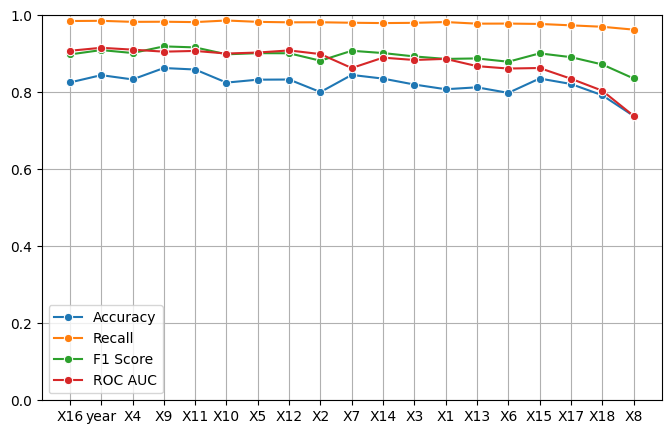

np.int64(1)

In [158]:
least

accuracy, recall = zip(*accuracy_recall)
f1score = []
for i in range(len(accuracy_recall)):
    f1score.append(2 * accuracy[i]*recall[i]/(accuracy[i]+recall[i]))

plt.figure(figsize=(8, 5))
sns.lineplot(x=least, y=accuracy,label='Accuracy', marker='o')
sns.lineplot(x=least, y = recall,label='Recall', marker='o')
sns.lineplot(x=least, y = f1score,label='F1 Score', marker='o')
sns.lineplot(x=least, y = roc,label='ROC AUC', marker='o')
plt.ylim(0, 1)
plt.grid(True)
plt.show()


np.argmax(roc)

Training Progress: 100%|██████████| 100/100 [00:21<00:00,  4.73tree/s]


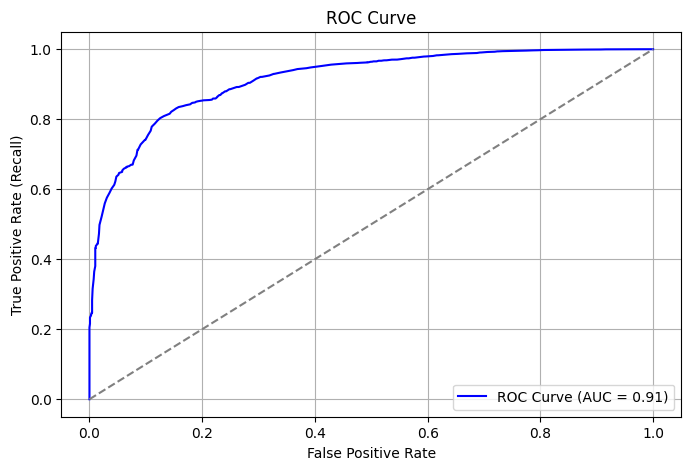

Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.82      0.37      1068
           1       0.98      0.81      0.89     14669

    accuracy                           0.81     15737
   macro avg       0.61      0.82      0.63     15737
weighted avg       0.93      0.81      0.85     15737



In [164]:
features = df.drop(['company_name', 'X16'], axis = 1).columns

data = df[features]
X, y = data.drop('status_label_alive', axis = 1), data['status_label_alive']
rfs_balanced = predictor_balanced_clasess(100, data) #train balanced

X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X, y, test_size=0.2, random_state=42) #train unbalanced
rf_unbalanced = RandomForestClassifier(
    n_estimators=1,  # Start with 1 tree
    warm_start=True,  # Enable incremental training
    n_jobs=-1,       # Use all CPU cores
    random_state=42
)

# Train with progress bar
for _ in tqdm(range(100), desc="Training Progress", unit="tree"):
    rf_unbalanced.n_estimators += 1  # Add one tree per iteration
    rf_unbalanced.fit(X_rf_train, y_rf_train)  # Fit incrementally
y_pred = prediction(2, weights[2], rfs_balanced, rf_unbalanced, X_rf_test)

proba_bal_1 = rfs_balanced[99].predict_proba(X_rf_test)
proba_bal_2 = rfs_balanced[98].predict_proba(X_rf_test)
proba_unbal = rf_unbalanced.predict_proba(X_rf_test)

weights = np.linspace(0,10,20)
probas = np.stack([proba_bal_1, proba_bal_2, proba_unbal])  # shape = (3, n_samples, 2)
weights = np.array([1, 1, weights[2]])

weighted_avg_proba = np.average(probas, axis=0, weights=weights)

y_scores = weighted_avg_proba[:, 1]


# Step 2: Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Step 3: Compute AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)

# Step 4: Plot
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

cr = classification_report(y_rf_test, y_pred)
print("Classification Report:")
print(cr)

In [166]:
recall_score(y_pred, y_rf_test)

0.9842741268001987